In [2]:
import  pandas as pd
import networkx as nx
from itertools import combinations
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data/2024-2025-1_report.csv')
df.head()

print(len(df['Course Title'].unique().tolist()))

178


In [4]:
df = df[['Roll Number', 'Course Title', 'Course Number', 'Credits']]
df.head()

,Roll Number,Course Title,Course Number,Credits
0,23282,Biology III: Fundamentals of Molecular Biology,BIO201X,3
1,23282,Biology V: Diversity of Life I,BIO203X,3
2,23282,Biology Laboratory I,BIO205Y,1
3,23282,Multivariable Calculus,MTH201X,3
4,23282,Introduction to Groups and Symmetry,MTH203,3


In [5]:
removed_courses = ['project', 'thesis', 'laboratory']
removed_course_code = ['PT101', 'BIO419', 'BIO639', 'ECO500', 'ECO600', 'IPR500', 'IPR600']

# Initial count of rows before filtering
initial_count = len(df)

# Step 1: Use regex matching for 'Course'
course_pattern = r'\b(?:' + '|'.join(removed_courses) + r')\b'
course_mask = df['Course Title'].str.contains(course_pattern, case=False, regex=True)

# Step 2: Exact match filtering for 'Course_Code'
code_mask = df['Course Number'].isin(removed_course_code)

# Step 3: Identify rows to be removed
removed_rows = df[course_mask | code_mask]

# Step 4: Print removed courses and course codes
print("Removed Rows:")
list = removed_rows['Course Title'].unique().tolist()
print(len(list))


# Step 5: Filter out the removed rows
filtered_df = df[~(course_mask | code_mask)]
filtered_df = filtered_df[['Roll Number', 'Course Title', 'Course Number', 'Credits']]
# 
# # Display the filtered DataFrame
# print("\nFiltered DataFrame:")
# print(filtered_df)


Removed Rows:
27


In [66]:
filtered_df.head()

,Roll Number,Course Title,Course Number,Credits
0,23282,Biology III: Fundamentals of Molecular Biology,BIO201X,3
1,23282,Biology V: Diversity of Life I,BIO203X,3
3,23282,Multivariable Calculus,MTH201X,3
4,23282,Introduction to Groups and Symmetry,MTH203,3
5,23282,Waves and Optics,PHY201X,3


CREATING GRAPH

In [6]:
course_students = filtered_df.groupby('Course Title')['Roll Number'].apply(set).to_dict()
for course in course_students:
    print(course)

3D Deep Learning and Applications
Advanced Academic Communication Skills
Advanced Deep Learning
Advanced Inorganic Chemistry
Advanced Linear Algebra
Advanced Mathematical Methods for Physics
Advanced Mineralogy
Advanced Molecular Spectroscopy
Advanced Organic Chemistry I(Organometallics and Asymmetric Synthesis)
Advanced Statistical Mechanics
Advances in Microbiology
Advances in Omics
Aerosol Science
Algebra I
An Introduction to Algebraic Number Theory
Analog Circuits
Applied Accelerated Artificial Intelligence
Atmospheric Sciences
Basic Electronics
Basic Organic Chemistry II
Basic Physical Chemistry
Biochemistry
Bioinorganic Chemistry
Biology I: Biomolecules
Biology III: Fundamentals of Molecular Biology
Biology V: Diversity of Life I
Biophysics and Structural Biology
Cell Biology
Cell Signaling and Stress Biology
Chemical Biology
Chemical Engineering Thermodynamics
Chemical Reaction Engineering II
Chemistry and Physics of Materials
Chemistry of Biological Systems
Classical Mechanics


In [7]:
G = nx.Graph()

G.add_nodes_from(course_students.keys())

for (course1, students1), (course2, students2) in combinations(course_students.items(), 2):
    if students1 & students2: 
        G.add_edge(course1, course2)

# Step 5: Print the graph information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print("Graph edges with shared students:")
for edge in G.edges:
    print(edge)


Number of nodes: 151
Number of edges: 1561
Graph edges with shared students:
('3D Deep Learning and Applications', 'Advanced Deep Learning')
('3D Deep Learning and Applications', 'Applied Accelerated Artificial Intelligence')
('3D Deep Learning and Applications', 'Cloud Computing')
('3D Deep Learning and Applications', 'Computer Networks')
('3D Deep Learning and Applications', 'Computer Organisation')
('3D Deep Learning and Applications', 'Computer Vision')
('3D Deep Learning and Applications', 'Cosmology II')
('3D Deep Learning and Applications', 'Data Analyses and Statistics for Geosciences')
('3D Deep Learning and Applications', 'Data Science in Practice')
('3D Deep Learning and Applications', 'Environmental Humanities')
('3D Deep Learning and Applications', 'Environmental Impact Assessment')
('3D Deep Learning and Applications', 'Fundamentals of Database Systems')
('3D Deep Learning and Applications', 'Introduction to Quantum Computer Science')
('3D Deep Learning and Applications',

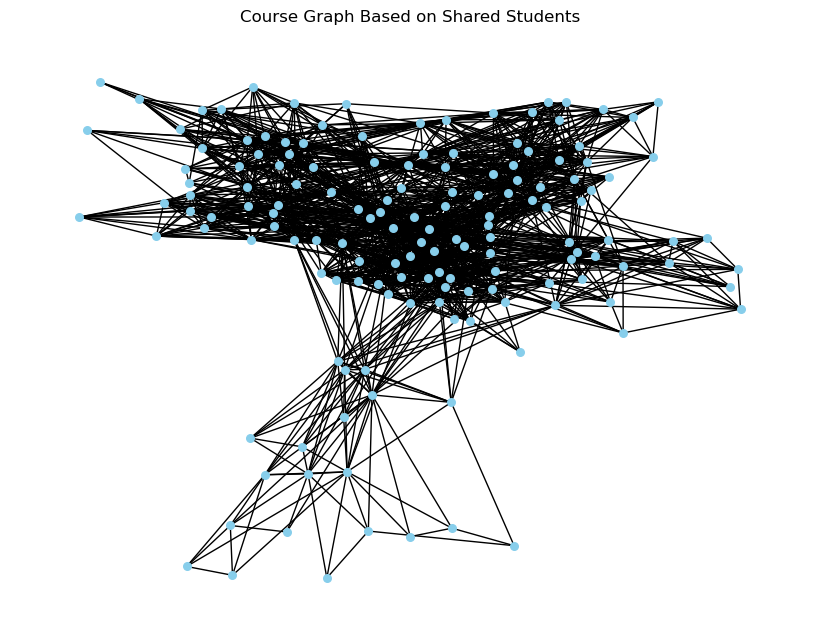

In [8]:
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=False, node_color='skyblue', node_size=30, font_size=15, font_weight='bold')
plt.title("Course Graph Based on Shared Students")
plt.show()

In [9]:
degree_dict = dict(G.degree())
sorted_degrees = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
for node in sorted_degrees:
    print(node)

('Reading Childrens Literature: Adventures, Ghosts and the Cultural Imagination', 86)
('Data Science in Practice', 68)
('Ethics for Research', 63)
('Learning, Memory, and Cognition', 53)
('Natural Language Processing', 44)
('Basic Organic Chemistry II', 42)
('Fundamentals of Database Systems', 41)
('Machine Learning', 41)
('Real Analysis I', 41)
('Philosophical Beginnings: Matter, Motion, and the Cosmos', 38)
('Statistical Mechanics', 38)
('Advances in Omics', 36)
('Computer Vision', 36)
('Linear Algebra', 36)
('Migration, State, and Society', 36)
('Basic Electronics', 34)
('Theory of Computation', 33)
('Waves and Optics', 33)
('General Chemistry', 32)
('Computer Organisation', 31)
('Main Group Chemistry', 31)
('Data Analyses and Statistics for Geosciences', 30)
('Electromagnetism', 30)
('Physical Organic Chemistry', 30)
('Geohydrology', 29)
('Introduction to Groups and Symmetry', 29)
('Money, Banking and Financial Markets', 29)
('Biochemistry', 28)
('Classical Mechanics', 28)
('Evolut

In [10]:
color_map = nx.coloring.greedy_color(G)

# Step 6: Count the number of courses per color (time slot)
color_counts = {}
for color in color_map.values():
    if color in color_counts:
        color_counts[color] += 1
    else:
        color_counts[color] = 1

# Print the number of courses for each color (time slot)
print("Number of courses in each color (time slot):")
for color, count in color_counts.items():
    print(f"Color {color}: {count} courses")

Number of courses in each color (time slot):
Color 0: 21 courses
Color 1: 13 courses
Color 2: 15 courses
Color 3: 16 courses
Color 4: 11 courses
Color 5: 10 courses
Color 6: 13 courses
Color 7: 12 courses
Color 8: 11 courses
Color 9: 9 courses
Color 10: 8 courses
Color 11: 5 courses
Color 12: 4 courses
Color 13: 2 courses
Color 14: 1 courses
